In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [7]:
dataset = fetch_california_housing()

In [9]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [10]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [11]:
df['target'] = dataset.target

In [12]:
df.shape

(20640, 9)

In [13]:
df=df.sample(frac=0.25)

In [14]:
df.shape

(5160, 9)

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
# X.head(),
y[:5]

11441    2.197
8762     3.568
14973    1.432
17559    1.693
14442    2.750
Name: target, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
dtree_reg = DecisionTreeRegressor()

In [22]:
dtree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
y_pred=dtree_reg.predict(X_test)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [26]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2s = r2_score(y_test,y_pred)
mse,rmse,mae,r2s

(0.6966910040331767,
 0.8346801806878948,
 0.5584256312389901,
 0.48379996076165177)

# hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameter = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto','sqrt','log2'],
}

In [29]:
grid_dtree_reg = GridSearchCV(DecisionTreeRegressor(),param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [30]:
grid_dtree_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [32]:
grid_dtree_reg.best_params_

{'criterion': 'poisson',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [34]:
y_pred = grid_dtree_reg.predict(X_test)

In [39]:
dtree_reg_best = DecisionTreeRegressor(criterion= 'poisson',
 max_depth= 7,
 max_features= 'auto',
 splitter= 'best')


In [40]:
dtree_reg_best.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto')

In [43]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2s = r2_score(y_test,y_pred)
mse,rmse,mae,r2s

(0.54479725237159, 0.7381038222171662, 0.5195737830640345, 0.5963427668462229)

[Text(0.5455437219730942, 0.9375, 'x[0] <= 4.598\npoisson = 0.3\nsamples = 3457\nvalue = 2.046'),
 Text(0.2771860986547085, 0.8125, 'x[0] <= 2.664\npoisson = 0.205\nsamples = 2532\nvalue = 1.648'),
 Text(0.14181614349775784, 0.6875, 'x[2] <= 3.877\npoisson = 0.153\nsamples = 990\nvalue = 1.254'),
 Text(0.07174887892376682, 0.5625, 'x[2] <= 2.665\npoisson = 0.149\nsamples = 285\nvalue = 1.623'),
 Text(0.03587443946188341, 0.4375, 'x[3] <= 0.995\npoisson = 0.185\nsamples = 52\nvalue = 2.096'),
 Text(0.017937219730941704, 0.3125, 'x[3] <= 0.756\npoisson = 0.032\nsamples = 7\nvalue = 1.268'),
 Text(0.008968609865470852, 0.1875, 'x[3] <= 0.632\npoisson = 0.0\nsamples = 2\nvalue = 0.922'),
 Text(0.004484304932735426, 0.0625, 'poisson = 0.0\nsamples = 1\nvalue = 0.938'),
 Text(0.013452914798206279, 0.0625, 'poisson = 0.0\nsamples = 1\nvalue = 0.906'),
 Text(0.026905829596412557, 0.1875, 'x[5] <= 2.96\npoisson = 0.017\nsamples = 5\nvalue = 1.407'),
 Text(0.02242152466367713, 0.0625, 'poisson =

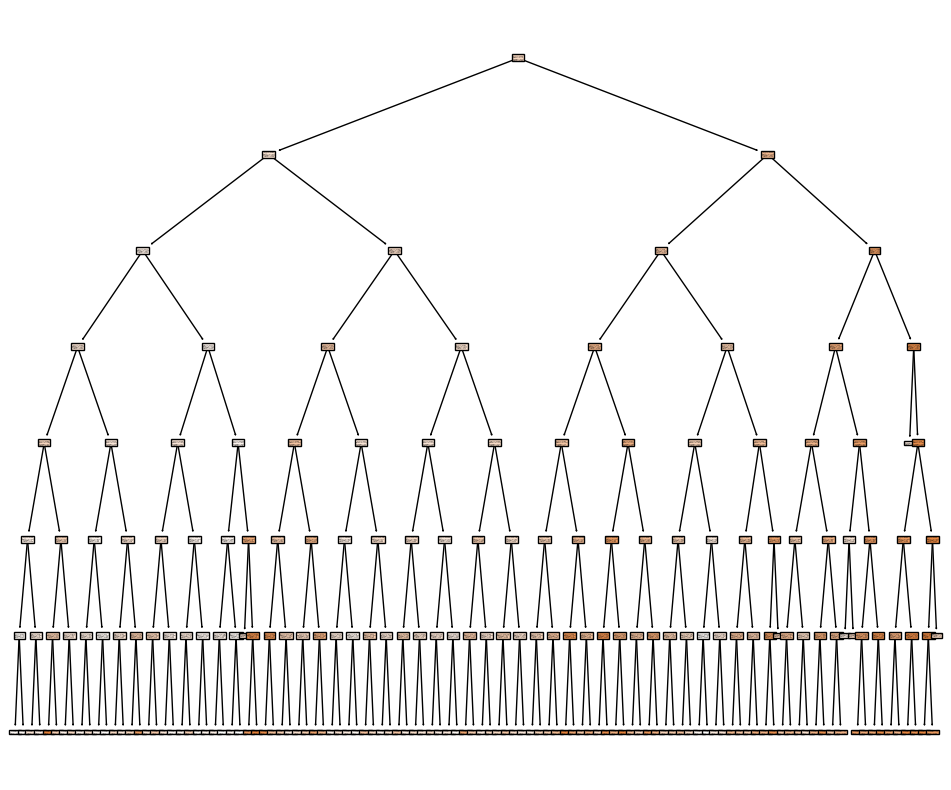

In [42]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtree_reg_best,filled=True)
# tree.plot_tree(grid_dtree_reg,filled=True)